# DI725 Project - Phase 1 - EDA

In [2]:
# import zipfile
# import os

# zip_path = 'RISCM.zip'           
# extract_to = './RISCM'          

# os.makedirs(extract_to, exist_ok=True)

# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_to)

# print("Extraction completed to:", extract_to)


In [3]:
import pandas as pd
import os
from PIL import Image

# Load the captions CSV file
df = pd.read_csv('./RISCM/captions.csv')

# Display the first few rows to understand the structure
print("🔹 First 5 rows:")
display(df.head())

# Display info about column names, data types, and non-null counts
print("\n🔹 Dataset Info:")
print(df.info())

# Check for any missing values in the dataset
print("\n🔹 Missing Value Check:")
print(df.isnull().sum())

# --- New Part: Analyze Image Dimensions ---
image_dir = './RISCM/resized'

# List to store image sizes
image_sizes = []

for image_name in df['image'].unique():
    image_path = os.path.join(image_dir, image_name)
    try:
        with Image.open(image_path) as img:
            image_sizes.append(img.size)  # (width, height)
    except FileNotFoundError:
        continue  # Skip missing images if any

# Create DataFrame from size tuples
size_df = pd.DataFrame(image_sizes, columns=['Width', 'Height'])

print("\n🔹 Image Size Distribution:")
print(size_df.describe())


🔹 First 5 rows:


,source,split,image,caption_1,caption_2,caption_3,caption_4,caption_5
0,NWPU,test,NWPU_31430.jpg,A gray plane on the runway and the lawn beside .,A grey plane is on the runway by the lawn .,There is an airplane on the runway with a larg...,A plane is parked on the runway next to the gr...,There is a plane on the runway beside the grass .
1,NWPU,test,NWPU_31431.jpg,Three small planes parked in a line on the air...,"There are four aircraft on the open ground, Th...",There are many planes of different sizes in a ...,Four planes are parked on the runway .,Four planes of different sizes were on the mar...
2,NWPU,test,NWPU_31432.jpg,A plane parked in a line on the airport with s...,A white plane was parked on the instruction li...,An airplane parked in an open area with many c...,A plane is parked on the open space .,There is 1 plane on the ground marked .
3,NWPU,test,NWPU_31433.jpg,A small plane and a big plane parked next to b...,A white plane and a gray plane parked at the b...,Two planes of different sizes are neatly parke...,A large plane and a small plane are parked nea...,Two planes are on the marked ground .
4,NWPU,test,NWPU_31434.jpg,Two planes parked next to boarding bridges .,Two aircraft were parked at the departure gates .,Two planes of different sizes are neatly parke...,Two planes are parked next to the terminal .,Two planes are on the marked ground .



🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44521 entries, 0 to 44520
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   source     44521 non-null  object
 1   split      44521 non-null  object
 2   image      44521 non-null  object
 3   caption_1  44521 non-null  object
 4   caption_2  44521 non-null  object
 5   caption_3  44521 non-null  object
 6   caption_4  44521 non-null  object
 7   caption_5  44521 non-null  object
dtypes: object(8)
memory usage: 2.7+ MB
None

🔹 Missing Value Check:
source       0
split        0
image        0
caption_1    0
caption_2    0
caption_3    0
caption_4    0
caption_5    0
dtype: int64

🔹 Image Size Distribution:
         Width   Height
count  44521.0  44521.0
mean     224.0    224.0
std        0.0      0.0
min      224.0    224.0
25%      224.0    224.0
50%      224.0    224.0
75%      224.0    224.0
max      224.0    224.0


🔹 Caption Length Statistics:
count    222605.000000
mean         12.085200
std           4.220994
min           5.000000
25%           9.000000
50%          11.000000
75%          14.000000
max          51.000000
dtype: float64


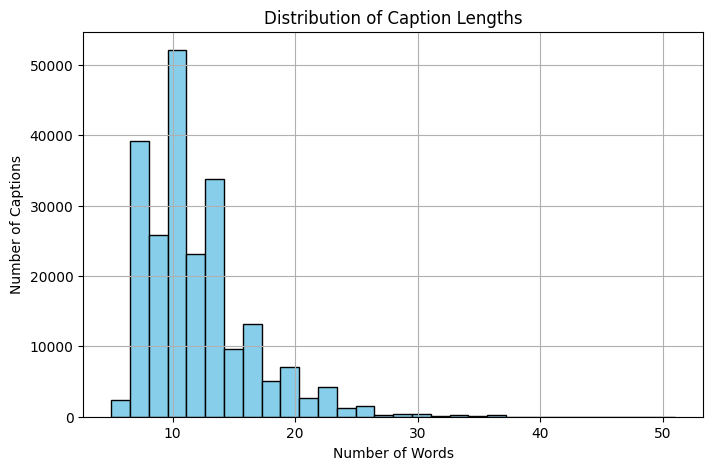

In [4]:
import matplotlib.pyplot as plt

# Combine all captions into a single Series for global analysis
captions_all = pd.concat([
    df['caption_1'], df['caption_2'], df['caption_3'],
    df['caption_4'], df['caption_5']
])

# Calculate caption lengths (number of words per caption)
caption_lengths = captions_all.apply(lambda x: len(str(x).split()))

# Show descriptive statistics
print("🔹 Caption Length Statistics:")
print(caption_lengths.describe())

plt.figure(figsize=(8, 5))
plt.hist(caption_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Caption Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Number of Captions")
plt.grid(True)
plt.show()

In [5]:
# Count number of images per split
split_counts = df['split'].value_counts()

# Calculate percentage per split
split_percentages = (split_counts / split_counts.sum()) * 100

print("🔹 Image counts and percentages per split:")
for split in split_counts.index:
    count = split_counts[split]
    percent = split_percentages[split]
    print(f"{split}: {count} images ({percent:.2f}%)")

🔹 Image counts and percentages per split:
train: 35614 images (79.99%)
test: 4454 images (10.00%)
val: 4453 images (10.00%)


In [6]:
import os

image_dir = './RISCM/resized'

# List of image filenames in the folder
image_files = set(os.listdir(image_dir))

# List of image filenames from the CSV
csv_images = set(df['image'].unique())

# Images listed in CSV but missing in the folder
missing_images = csv_images - image_files

# Images in the folder but not mentioned in CSV
uncaptioned_images = image_files - csv_images

print(f"🔹 Missing images (listed in CSV but not found in folder): {len(missing_images)}")
if missing_images:
    print("Example missing images:", list(missing_images)[:5])
else:
    print("✅ All images in CSV exist in the folder.")

print(f"\n🔹 Unused images (found in folder but not listed in CSV): {len(uncaptioned_images)}")
if uncaptioned_images:
    print("Example unused images:", list(uncaptioned_images)[:5])
else:
    print("✅ All images in folder are used in the CSV.")


🔹 Missing images (listed in CSV but not found in folder): 0
✅ All images in CSV exist in the folder.

🔹 Unused images (found in folder but not listed in CSV): 0
✅ All images in folder are used in the CSV.


In [7]:
# Check if any of the caption fields are empty or null
caption_columns = ['caption_1', 'caption_2', 'caption_3', 'caption_4', 'caption_5']

# Count rows where any of the captions are missing or empty
incomplete_rows = df[caption_columns].isnull().any(axis=1) | (df[caption_columns] == '').any(axis=1)

num_incomplete = incomplete_rows.sum()

print(f"🔹 Rows with missing or empty captions: {num_incomplete}")

# Optionally, display a few of them
if num_incomplete > 0:
    print("\nExample rows with missing/empty captions:")
    display(df[incomplete_rows].head())
else:
    print("✅ All rows have 5 non-empty captions.")


🔹 Rows with missing or empty captions: 0
✅ All rows have 5 non-empty captions.


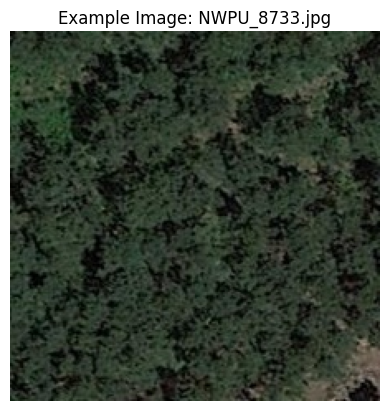

🔹 Captions for NWPU_8733.jpg
Caption 1: The forest has a lot of dense dark green trees .
Caption 2: This is a dense forest .
Caption 3: Many green trees are in a forest .
Caption 4: The forest is consist of dry trees and green trees .
Caption 5: A dense forest with many green trees .


In [8]:
import matplotlib.image as mpimg

# Choose a random image-caption row
sample_row = df.sample(1).iloc[0]
img_path = os.path.join(image_dir, sample_row['image'])

img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off')
plt.title("Example Image: " + sample_row['image'])
plt.show()

print("🔹 Captions for", sample_row['image'])
for i in range(1, 6):
    print(f"Caption {i}:", sample_row[f'caption_{i}'])


🔹 Unique 'source' values and their image counts:
source
NWPU     31500
RSICD    10921
UCM       2100
Name: count, dtype: int64


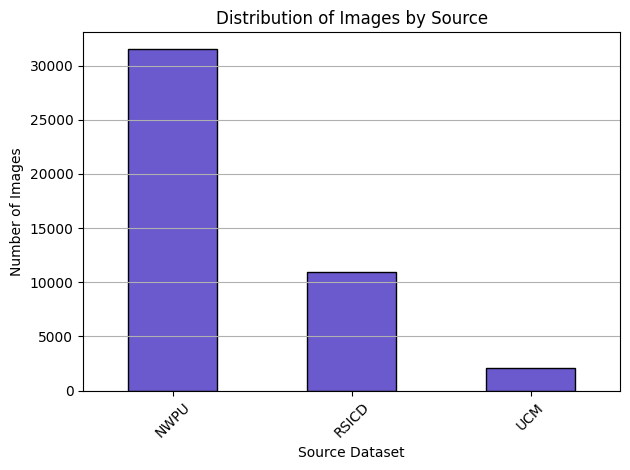

In [9]:
# Count unique sources
source_counts = df['source'].value_counts()

print("🔹 Unique 'source' values and their image counts:")
print(source_counts)

import matplotlib.pyplot as plt

source_counts.plot(kind='bar', color='slateblue', edgecolor='black')
plt.title("Distribution of Images by Source")
plt.xlabel("Source Dataset")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


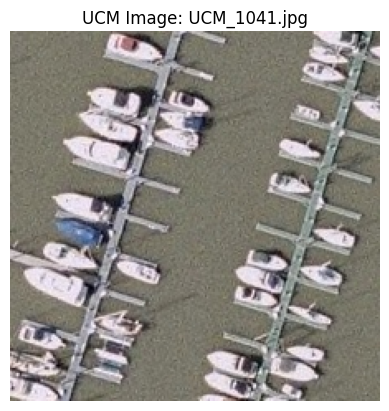

🔹 Captions for UCM_1041.jpg:
Caption 1: Lots of boats docked at the harbor and the water is turbid .
Caption 2: Lots of boats docked neatly at the harbor .
Caption 3: Many boats docked neatly at the harbor and the water is turbid .
Caption 4: Many boats docked neatly at the harbor and some positions are free .
Caption 5: Lots of boats docked neatly at the harbor and some positions are free .


In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Filter rows where source is 'UCM'
ucm_rows = df[df['source'] == 'UCM']

# If there are any rows, sample and display
if not ucm_rows.empty:
    sample = ucm_rows.sample(1).iloc[0]
    image_path = os.path.join('./RISCM/resized', sample['image'])

    # Load and show the image
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"UCM Image: {sample['image']}")
    plt.show()

    # Print all 5 captions
    print(f"🔹 Captions for {sample['image']}:")
    for i in range(1, 6):
        print(f"Caption {i}:", sample[f'caption_{i}'])

else:
    print("⚠️ No images found with source == 'UCM'.")


In [13]:
import pandas as pd

# Define caption columns and readable labels
caption_cols = ['caption_1', 'caption_2', 'caption_3', 'caption_4', 'caption_5']
duplicate_labels = {
    0: "All unique",
    1: "2 identical",
    2: "3 identical",
    3: "4 identical",
    4: "All identical"
}
ordered_levels = list(duplicate_labels.values())

# Count identical captions for each row
def count_identical_captions(row):
    captions = [row[col].strip().lower() for col in caption_cols]
    return 5 - len(set(captions))

df['num_duplicates'] = df.apply(count_identical_captions, axis=1)
df['dup_level'] = df['num_duplicates'].map(duplicate_labels)

# ---- 1. Overall Duplication Summary ----
total_images = len(df)
duplicate_dist = df['dup_level'].value_counts().reindex(ordered_levels)
dup_percent = (duplicate_dist / total_images * 100).round(2)
dup_summary = pd.DataFrame({
    'Image Count': duplicate_dist,
    'Percentage (%)': dup_percent
})

print(f"🔹 Total number of images: {total_images}\n")
print("🔹 Overall Caption Duplication Summary:")
print(dup_summary)

# ---- 2. Duplication by Split ----
split_dist = pd.crosstab(df['dup_level'], df['split']).reindex(ordered_levels)
split_percent = (split_dist / split_dist.sum(axis=0) * 100).round(2)
split_combined = split_dist.astype(str) + " (" + split_percent.astype(str) + "%)"

print("\n🔹 Duplication Level by Split (count and %):")
print(split_combined)

# ---- 3. Duplication by Source ----
source_dist = pd.crosstab(df['dup_level'], df['source']).reindex(ordered_levels)
source_percent = (source_dist / source_dist.sum(axis=0) * 100).round(2)
source_combined = source_dist.astype(str) + " (" + source_percent.astype(str) + "%)"

print("\n🔹 Duplication Level by Source (count and %):")
print(source_combined)


🔹 Total number of images: 44521

🔹 Overall Caption Duplication Summary:
               Image Count  Percentage (%)
dup_level                                 
All unique           33364           74.94
2 identical           2346            5.27
3 identical           2125            4.77
4 identical           1810            4.07
All identical         4876           10.95

🔹 Duplication Level by Split (count and %):
split                   test           train           val
dup_level                                                 
All unique     3365 (75.55%)  26686 (74.93%)  3313 (74.4%)
2 identical      162 (3.64%)    1617 (4.54%)  567 (12.73%)
3 identical     486 (10.91%)    1320 (3.71%)   319 (7.16%)
4 identical      111 (2.49%)    1447 (4.06%)   252 (5.66%)
All identical    330 (7.41%)   4544 (12.76%)     2 (0.04%)

🔹 Duplication Level by Source (count and %):
source                  NWPU          RSICD            UCM
dup_level                                                 
All u

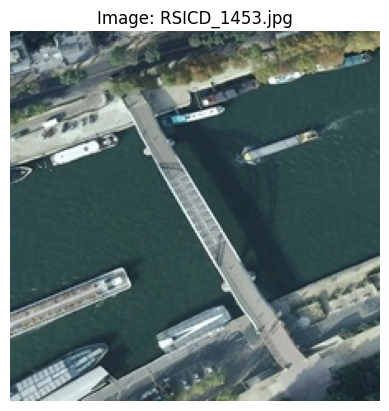

🔹 Repeated Caption (Identical x5):
a bridge is over a river with some boats in it and some green trees in two sides of it .


In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Filter rows where all 5 captions are identical
identical_rows = df[df['num_duplicates'] == 4]

# If there are such rows, pick one
if not identical_rows.empty:
    sample = identical_rows.sample(1).iloc[0]
    image_path = os.path.join('./RISCM/resized', sample['image'])

    # Show the image
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Image: {sample['image']}")
    plt.show()

    # Print repeated caption
    repeated_caption = sample['caption_1']
    print("🔹 Repeated Caption (Identical x5):")
    print(repeated_caption)

else:
    print("✅ No image found with all 5 captions being identical.")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


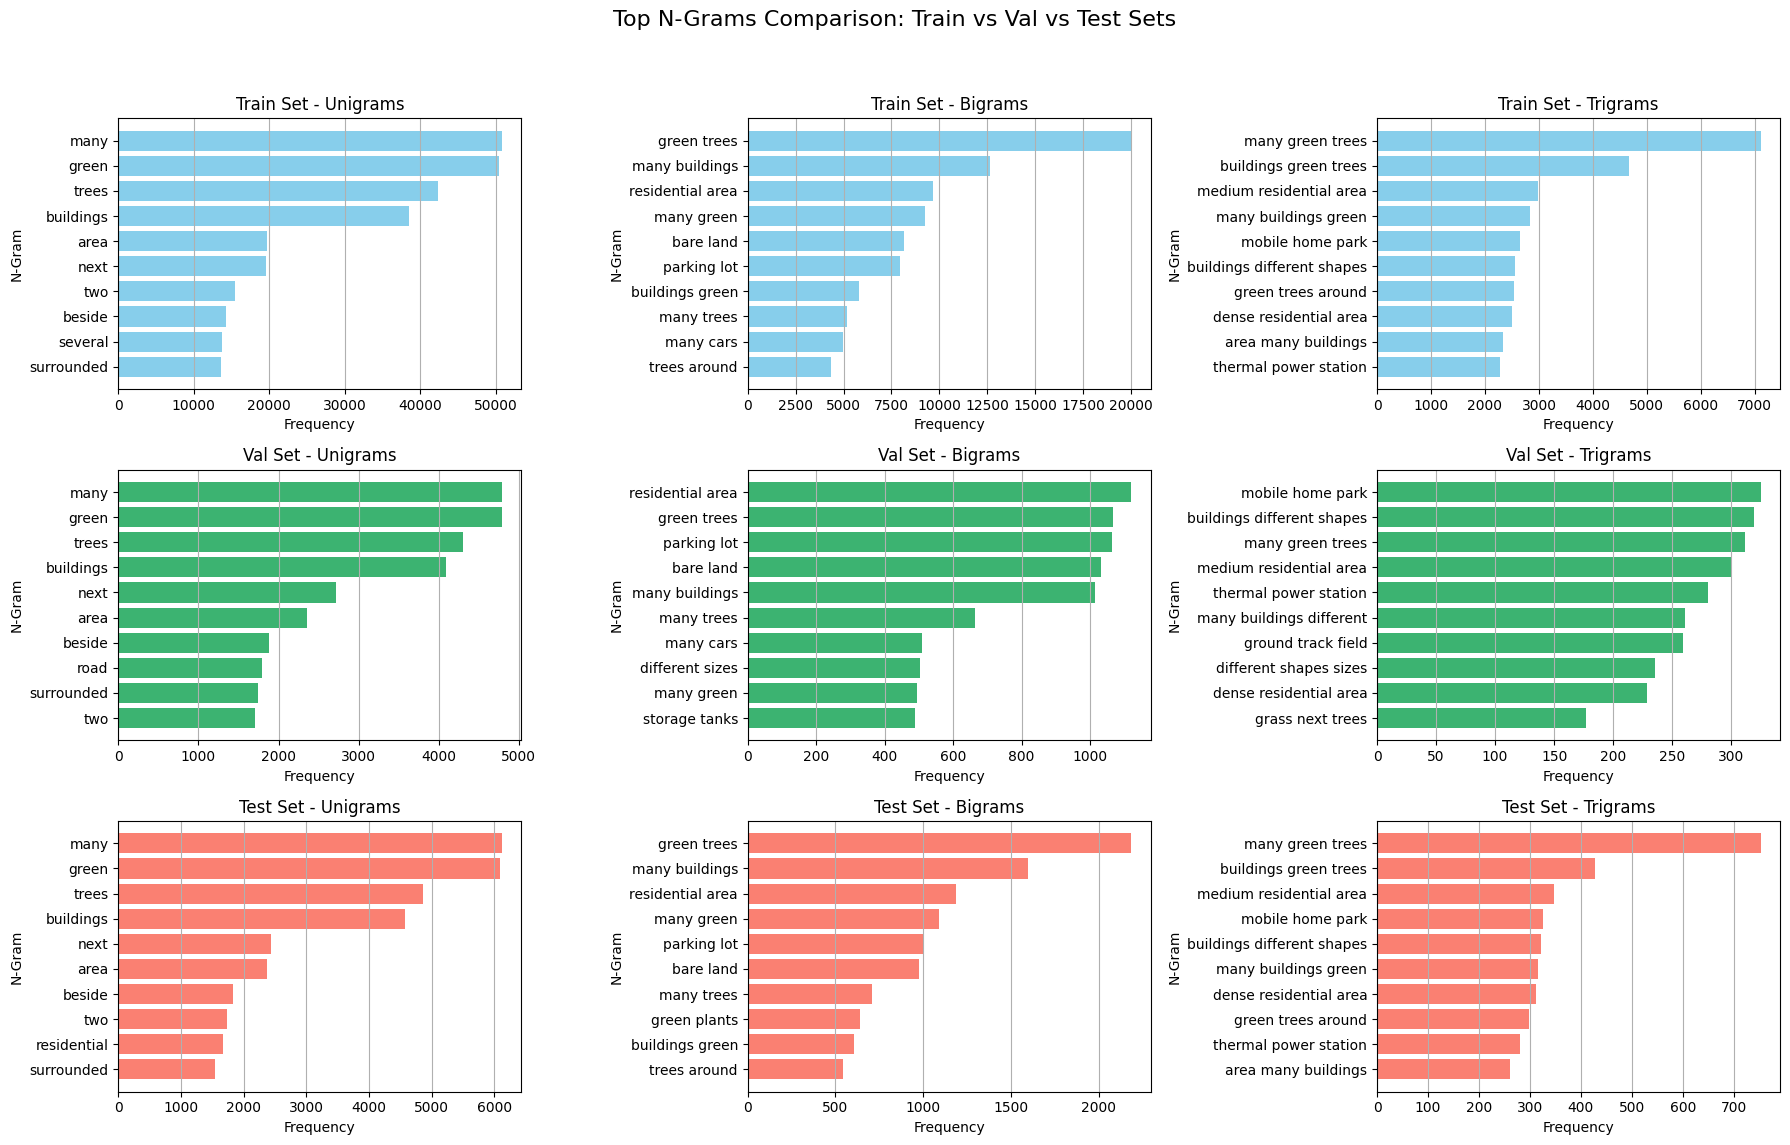

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.util import ngrams
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

# Define stopwords
stop_words = set(stopwords.words('english'))

# Helper function to extract top n-grams from captions
def get_top_ngrams(captions, n=1, top_n=10):
    text = ' '.join(captions).lower()
    tokens = nltk.word_tokenize(text)
    tokens = [t for t in tokens if t.isalnum() and t not in stop_words]
    ngram_list = list(ngrams(tokens, n))
    counter = Counter(ngram_list).most_common(top_n)
    return [' '.join(gram) for gram, _ in counter], [count for _, count in counter]

# Extract captions by split
caption_cols = ['caption_1', 'caption_2', 'caption_3', 'caption_4', 'caption_5']
splits = ['train', 'val', 'test']
split_captions = {
    split: df[df['split'] == split][caption_cols].values.flatten()
    for split in splits
}

# Prepare n-gram data
ngrams_data = {}
for n in [1, 2, 3]:
    for split in splits:
        ngrams_data[f'{split}_{n}'] = get_top_ngrams(split_captions[split], n=n)

# Plot: 3 rows (splits), 3 columns (n-gram sizes)
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle("Top N-Grams Comparison: Train vs Val vs Test Sets", fontsize=16)

titles = ['Unigrams', 'Bigrams', 'Trigrams']
colors = ['skyblue', 'mediumseagreen', 'salmon']

for row_idx, split in enumerate(splits):
    for col_idx, n in enumerate([1, 2, 3]):
        labels, counts = ngrams_data[f'{split}_{n}']
        ax = axes[row_idx][col_idx]
        ax.barh(labels[::-1], counts[::-1], color=colors[row_idx])
        ax.set_title(f"{split.capitalize()} Set - {titles[col_idx]}")
        ax.set_xlabel("Frequency")
        ax.set_ylabel("N-Gram")
        ax.grid(True, axis='x')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
